<a href="https://colab.research.google.com/github/gizdatalab/fragile_context/blob/master/SocialMediaListening.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Social Media Listening

## Facebook & Instagram
https://developers.facebook.com/docs/graph-api?locale=de_DE
  * free: scraping profile from open accounts
  * hashtag search only via graph-api, but limited

## Twitter
https://developer.twitter.com/en/products/twitter-api  
*  free: scraping profiles and hashtags, also historical (limited amount)
* twitter api with corporate packages for full access 
    


##GDELT
latform that monitors the world's news media from nearly every corner of every country in print, broadcast, and web formats, in over 100 languages, every moment of every day and that stretches back to January 1, 1979 through present day, with daily updates...

# Twitter Scraping

## get connection to databasae (drive)

In [ ]:
from google.colab import drive, files

drive.mount('/content/gdrive')
path_drive ='/content/gdrive/My Drive/giz/fragil/'

Mounted at /content/gdrive


## get project code from github

In [ ]:
!git clone 'https://github.com/gizdatalab/fragile_context'

Cloning into 'fragile_context'...
remote: Enumerating objects: 57, done.
remote: Counting objects: 100% (57/57), done.
remote: Compressing objects: 100% (54/54), done.
remote: Total 57 (delta 31), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (57/57), done.


## install required packages

In [ ]:
%%capture
!pip install -r 'fragile_context/requirements.txt'

In [ ]:
from fragile_context import twitter_fct
import pandas as pd
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline 

from datetime import timedelta
from string import ascii_letters, digits
from os import mkdir, path
import twint


In [ ]:
%%capture
!twint -u GIZ_Data_Lab --csv --output giz.csv --lang en --limit 1 

In [ ]:
df = pd.read_csv('giz.csv')
df.iloc[0].T

id                                               1304759444140683264
conversation_id                                  1304759444140683264
created_at                                             1599913867000
date                                                      2020-09-12
time                                                        12:31:07
timezone                                                         UTC
user_id                                          1254762450475528192
username                                                giz_data_lab
name                                                    GIZ Data Lab
place                                                            NaN
tweet              This week we visited @roblohmeyer & @finitodem...
mentions                           ['roblohmeyer', 'finitodemunich']
urls                                                              []
photos             ['https://pbs.twimg.com/media/Ehts0OeWkAETJ6g....
replies_count                     

## get twitter posts for lookup text on monthly basis

In [ ]:
lookup = 'arabspring'
start = '12-01-2010'
end = '12-01-2012'
dirn = path_drive + 'arabspring'
min_repost = 1

if False:
    twitter_fct.twint_loop(lookup,start,end,dirn,min_repost)

In [ ]:
def plot_ts(df):
    df.groupby('date')['conversation_id'].count().plot(figsize=(15,3))
    plt.xticks(rotation=45)

In [ ]:
%%capture
!pip install transformers
from transformers import pipeline

nlp = pipeline("sentiment-analysis")

label_map = {
    'NEGATIVE' : -1,
    'POSITIVE' : 1
}

def sent_score(x):
  res = nlp(x)[0]
  score = label_map[res['label']] * res['score']
  return score

RuntimeError: ignored

# #ARABSPRING - A lesson in conflict monitoring through social media
description are taken from: https://moveme.berkeley.edu/project/arab-spring/

### Mohamed Bouazizi - 17.12.2010

* 17.12.2010  
Suicide of Mohamed Bouazizi, a Tunisian street trader.
Tired of the regime and not being able to escape it, he set himself on fire.[8] Egypt was in the midst of a war on terror that sparked the Arab Spring.[9]

We try to scrape tweets whith a geo-tag of Ben Arous, where the street trader died, in the south of tunis and 10km around, from the 17.12.2011 till the end of the year.

In [ ]:
%%capture
!twint -g="36.749029, 10.231235,10km" --since "2010-12-15 00:00:00" --until "2010-12-31 00:00:00" -o bouazizi.csv --csv --limit 100

In [ ]:
df_bouazizi = twitter_fct.load('bouazizi.csv')
print()
df_bouazizi['tweet'][:3]

tweets: 400
tweets per day: 67.67 from 2010-12-24 00:00:00 to 2010-12-30 00:00:00
en    388
hu      8
fr      4
Name: lang, dtype: int64



id
20076587978334208    current weather: partly cloudy — 13°C — 67% hu...
20076587978334208    current weather: partly cloudy — 13°C — 67% hu...
20076587978334208    current weather: partly cloudy — 13°C — 67% hu...
Name: tweet, dtype: object

97% of the tweets are in english language and the example texts look like from a weather station.  
Therefore even with knowing the exact location, geo tags might not be usefull for context monitoring.

#### Learnings
* geolocation not provided in > 95% of tweets, often technical accounts
* for information about location one need to search for hashtags / in post mentions  
  


  number of tweets in one week per location:
* ben arous 9 / بن عروس  1
* tunis 1342 / 833 تونس
* tunesia 2981 
-> for arabic names, languages of tweets mostly arabic /vice versa


In [ ]:
dirn = path_drive + 'tunisia'
df = twitter_fct.load_folder(dirn+'/')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


tweets: 282373
tweets per day: 1172.67 from 2010-09-01 00:00:00 to 2011-04-30 00:00:00
en    207982
ar     28169
pt     12315
Name: lang, dtype: int64


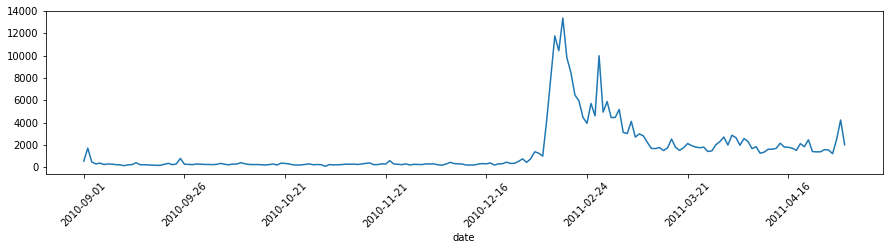

In [ ]:
plot_ts(df)

In [ ]:
df['year'] = df.date_time.dt.year
df['month'] = df.date_time.dt.month

### Popular Tweets in November

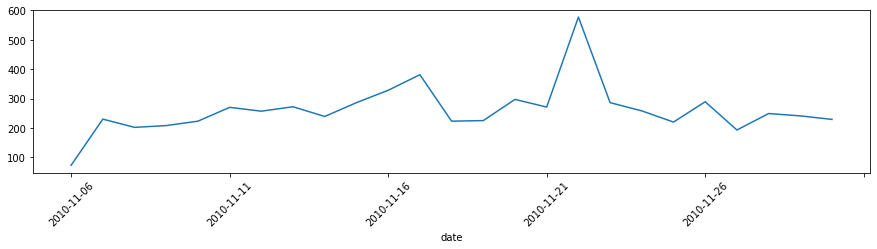

In [ ]:
nov = df[(df['year']== 2010) & (df['month']==11)]
nov=nov.sort_values('retweets_count',ascending=False) 
plot_ts(nov)

#### most Retweets

In [ ]:
for i in [0,1,2]:
    sample_tweet_link = nov.iloc[i]['link']
    display(sample_tweet_link)
    twitter_fct.show_tweet(sample_tweet_link)


'https://twitter.com/NASA/status/9352851335684096'

'https://twitter.com/JBiebersHamster/status/4611291876425728'

'https://twitter.com/lonelyplanet/status/7467529651888128'

#### Most important Hashtags

In [ ]:
twitter_fct.mvh(nov,10)

/content/fragile_context/twitter_fct.py:96: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  hashtags_g = hashtags.groupby('hashtag')['score','count','retweets_count','replies_count','likes_count'].sum()


,hashtag,score,count,retweets_count,replies_count,likes_count,translation
0,#tunisia,218,643,42,0,8,tunisia
1,#wikileaks,74,46,14,0,4,wikileaks
2,#tunileaks,73,33,14,0,3,tunileaks
3,#lp,58,9,10,0,8,lp
4,#cablegate,56,30,11,0,1,cablegate
5,#des,48,2,9,0,3,of
6,#travel,40,55,8,0,0,travel
7,#ammantt,35,4,7,0,0,ammantt
8,#censorship,30,16,6,0,0,censorship
9,"#tunisia""",25,2,5,0,0,"tunisia"""


### Popular Tweets in December

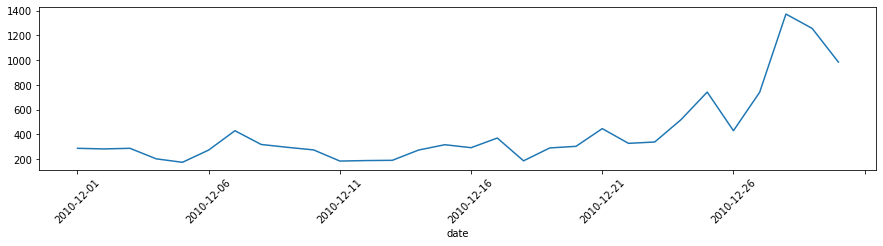

In [ ]:
dec = df[(df['year']== 2010) & (df['month']==12)]
dec=dec.sort_values('retweets_count',ascending=False) 
plot_ts(dec)

#### Most Retweets

In [ ]:
for i in [0,1,2]:
    sample_tweet_link = dec.iloc[i]['link']
    display(sample_tweet_link)
    twitter_fct.show_tweet(sample_tweet_link)


'https://twitter.com/rafik/status/18615718786367488'

'https://twitter.com/ifikra/status/20135469803114496'

'https://twitter.com/weddady/status/18506755948421120'

#### Most important Hashtags

In [ ]:
twitter_fct.mvh(dec,10)

/content/fragile_context/twitter_fct.py:96: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  hashtags_g = hashtags.groupby('hashtag')['score','count','retweets_count','replies_count','likes_count'].sum()


,hashtag,score,count,retweets_count,replies_count,likes_count,translation
0,#sidibouzid,15564,2263,3067,3,220,Happybazed
1,#tunisia,14267,3152,2812,0,207,tunisia
2,#egypt,663,184,131,0,8,egypt
3,#censorship,630,97,124,0,10,censorship
4,#netfreedom,489,60,96,0,9,netfreedom
5,#tunisiavimeo,460,15,91,0,5,tunisiavimeo
6,#humanrights,389,60,77,0,4,humanrights
7,#tunisie,365,119,71,0,10,tunisia
8,#wikileaks,312,125,60,0,12,wikileaks
9,#iran,290,29,57,0,5,iran


In [ ]:
jan = df[(df['year']== 2011) & (df['month']==1)]
twitter_fct.mvh(jan,10)

/content/fragile_context/twitter_fct.py:96: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  hashtags_g = hashtags.groupby('hashtag')['score','count','retweets_count','replies_count','likes_count'].sum()


,hashtag,score,count,retweets_count,replies_count,likes_count,translation
0,#tunisia,75829,17998,14895,7,1333,tunisia
1,#egypt,61017,11002,11989,4,1060,egypt
2,#jan25,41389,4804,8167,2,548,Impotence
3,#sidibouzid,26003,4512,5120,5,388,Happybazed
4,#yemen,11371,1844,2231,1,213,yemen
5,#palestine,4283,445,842,0,73,palestine
6,#revolution,3277,669,646,0,47,revolution
7,#tunisie,2885,1301,568,0,45,tunisia
8,#sotu,2754,550,540,0,54,sotu
9,#mubarak,2467,428,489,0,22,mubarak


*In Ägypten beginnt der Volksaufstand am 25. Januar 2011, als zehntausende Demonstranten in Kairo auf dem Tahrir-Platz, dem Platz der Befreiung, den Rücktritt der Regierung fordern. Das korrupte und autoritäre Regime von Hosni Mubarak setzt auf Härte. Die Sicherheitskräfte gehen von Anfang an massiv gegen die Proteste vor. Zunächst werden Facebook und Twitter gesperrt, dann das Internet und die Mobilfunknetze abgeschaltet.*

* Twitter is used by the protestors as communication tool to show ground info in realtime - also explicit to the west
* they therfore mainly used hastags in english language, even with arabic posts
 

### Time series of Hashtags

(array([-25.,   0.,  25.,  50.,  75., 100., 125., 150., 175., 200.]),
 <a list of 10 Text major ticklabel objects>)

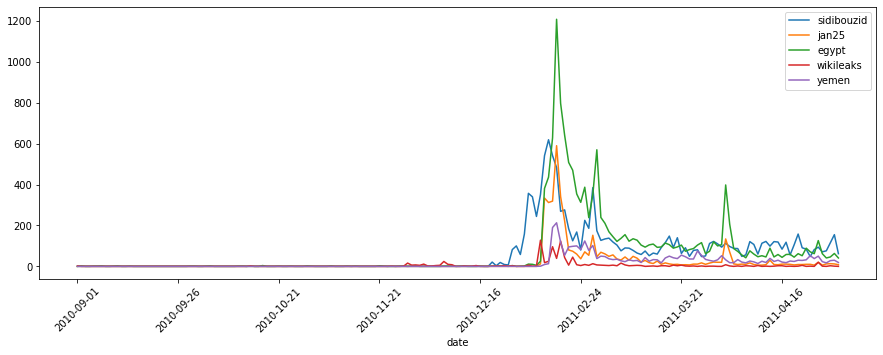

In [ ]:
df['sidibouzid'] = twitter_fct.ht2var(df,'sidibouzid')
df['jan25'] = twitter_fct.ht2var(df,'jan25')
df['egypt'] = twitter_fct.ht2var(df,'egypt')
df['wikileaks'] = twitter_fct.ht2var(df,'wikileaks')
df['yemen'] = twitter_fct.ht2var(df,'yemen')

df.groupby('date')[['sidibouzid','jan25','egypt','wikileaks','yemen']].sum().plot(figsize=(15,5))
plt.xticks(rotation=45)

In [ ]:
df[['sidibouzid','jan25','egypt','wikileaks','yemen']].corr()

,sidibouzid,jan25,egypt,wikileaks,yemen
sidibouzid,1.000000,0.109863,0.016487,0.000204,-0.005871
jan25,0.109863,1.000000,0.197573,0.003178,0.062646
egypt,0.016487,0.197573,1.000000,0.028681,0.362445
wikileaks,0.000204,0.003178,0.028681,1.000000,0.011483
yemen,-0.005871,0.062646,0.362445,0.011483,1.000000


#### Influencial User

In [ ]:
df['username'].value_counts()[:5]

ugottoknow        3754
stopbloodshed     2916
tunisiatrends     2235
froghiran         2111
counterwording    1742
Name: username, dtype: int64

In [ ]:
twitter_fct.mvu(df,10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  # Remove the CWD from sys.path while we load stuff.


,username,score,count,retweets_count,replies_count,likes_count
0,refugees,16458,126,3255,1,180
1,breakingnews,13079,33,2578,0,189
2,ghonim,12341,14,2416,0,261
3,ajenglish,11938,48,2355,0,163
4,dima_khatib,11647,253,2301,1,139
5,bencnn,10875,17,2153,0,110
6,sultanalqassemi,8405,56,1662,0,95
7,wikileaks,8105,6,1577,1,217
8,iamwill,7359,1,1458,0,69
9,nickkristof,7079,7,1401,0,74


In [ ]:
sample_tweet_link = df[df['username']=='refugees'].iloc[0]['link']
display(sample_tweet_link)
twitter_fct.show_tweet(sample_tweet_link)

'https://twitter.com/Refugees/status/42949859334045696'

In [ ]:
sample_tweet_link = df[df['username']=='breakingnews'].iloc[0]['link']
display(sample_tweet_link)
twitter_fct.show_tweet(sample_tweet_link)

'https://twitter.com/BreakingNews/status/30553383001657344'

In [ ]:
sample_tweet_link = df[df['username']=='ghonim'].iloc[0]['link']
display(sample_tweet_link)
twitter_fct.show_tweet(sample_tweet_link)

'https://twitter.com/Ghonim/status/41983439280283648'

# Twitter Listening for al-Anbar Region

get twitter posts for lookup text on monthly basis

In [ ]:
lookup = 'الانبار محافظة'
start = '12-01-2019'
end = '12-01-2019'
dirn = path_drive + 'alanbar_ar'
min_repost = 1

if False:
    twitter_fct.twint_loop(lookup,start,end,dirn,min_repost)

In [ ]:
dirn = path_drive + 'alanbar'
df = twitter_fct.load_folder(dirn+'/')

tweets: 552
tweets per day: 3.16 from 2020-01-01 00:00:00 to 2020-09-13 00:00:00
en    357
es     86
fr     61
Name: lang, dtype: int64


# al-Anbar

load data and print date range, number of tweets (per day) and distrubution of languages

In [ ]:
dirn = path_drive + 'alanbar'
df = twitter_fct.load_folder(dirn+'/')

tweets: 552
tweets per day: 3.16 from 2020-01-01 00:00:00 to 2020-09-13 00:00:00
en    357
es     86
fr     61
Name: lang, dtype: int64


In [ ]:
df = df[df['lang']=='en']
df['senti'] = df['tweet'].apply(lambda x: sent_score(x))

show number of tweets on a timeline

In [ ]:
plot_ts(df)

NameError: ignored

### Sentiment

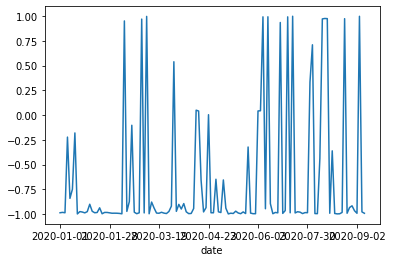

In [ ]:
df.groupby('date')['senti'].mean().plot()

In [ ]:
df = df.sort_values('senti')

print('negative')
for i in [0,1,2]:
    print(df['tweet'].iloc[i])
    print(df['senti'].iloc[i])
print()
print('positive')
for i in [0,1,2]:
    j = len(df) - i -1
    print(df['tweet'].iloc[j])
    print(df['senti'].iloc[j])

negative
An Iraqi source said the al-Assad radar system was completely destroyed by the US air base in al-Anbar province in Iraq. Whereas @POTUS said there happened no causality.  https://parstoday.com/bn/news/iran-i76565 …
-0.999564528465271
Think about of all places Iran could hit, it goes for the northern military bases in Erbil and Al-Anbar. It doesn’t take a genius to figure out where their alliances are.
-0.9995473623275757
Though @POTUS claimed there's no causality. An Iraqi source said the al-Assad radar system was completely destroyed at the US air base in al-Anbar province in Iraq.

And Israeli source said that 227 wounded US troops were taken to Tel Aviv for treatment.  https://parstoday.com/bn/news/iran-i76565 …
-0.9995070695877075

positive
It snowed in Al-Anbar province on Christmas Day 2003. It was impressive to see.
0.9997878670692444
Great article, thank you. Reminded me of my own time in Iraq with the 11th MEU and similar efforts we undertook in the Al-Anbar province,

show most popular hashtags, weighted by likes, replies and retweets

In [ ]:
twitter_fct.mvh(df,10)

/content/fragile_context/twitter_fct.py:96: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  hashtags_g = hashtags.groupby('hashtag')['score','count','retweets_count','replies_count','likes_count'].sum()


,hashtag,score,count,retweets_count,replies_count,likes_count,translation
0,#iraq,5783,71,766,95,1668,iraq
1,#quiz,2770,1,211,214,1073,quiz
2,#nintendo,2770,1,211,214,1073,nintendo
3,#quizprank,2770,1,211,214,1073,quizprank
4,#us,2029,24,266,58,525,us
5,#usaf,1427,11,189,13,443,usaf
6,#iran-backed,1324,6,205,10,269,iran-backed
7,#iran,882,13,119,23,218,iran
8,#update,852,4,130,6,184,update
9,#breakingnews,749,2,108,14,167,breakingnews


### show most lieked tweets

In [ ]:
for i in [1,2]:
    sample_tweet_link = df.iloc[i]['link']
    display(sample_tweet_link)
    twitter_fct.show_tweet(sample_tweet_link)


'https://twitter.com/Dorrar_/status/1214782338560749570'

'https://twitter.com/FazlurR32437526/status/1215645601037242370'

### show most influencial users

In [ ]:
tw_user = twitter_fct.mvu(df,10)
tw_user

/content/fragile_context/twitter_fct.py:109: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  hashtags_g = hashtags.groupby('username')['score','count','retweets_count','replies_count','likes_count'].sum()


,username,score,count,retweets_count,replies_count,likes_count
0,omg_police,2770,1,211,214,1073
1,no_itsmyturn,1569,12,180,20,609
2,heshmatalavi,1318,3,204,10,268
3,ejmalrai,1290,3,189,26,267
4,auroraintel,739,2,114,5,154
5,rattrashreyansh,645,1,68,6,287
6,n_carvalheira,638,1,69,17,242
7,shafei_d,486,1,46,5,241
8,inbarcohen13,459,2,44,19,182
9,a7_mirza,373,6,54,2,97


In [ ]:
for users in tw_user['username'][:3]:
    sample_tweet_link = df[df['username']==users].iloc[0]['link']
    display(sample_tweet_link)
    twitter_fct.show_tweet(sample_tweet_link)

'https://twitter.com/Omg_Police/status/1289590675978072064'

'https://twitter.com/no_itsmyturn/status/1213930091404832768'

'https://twitter.com/HeshmatAlavi/status/1212327754538135553'

# al-Anbar (arab lang scraped)

In [ ]:
dirn = path_drive + 'alanbar_ar'
df = twitter_fct.load_folder(dirn+'/')

tweets: 5711
tweets per day: 20.97 from 2019-12-03 00:00:00 to 2020-09-14 00:00:00
ar    5488
es      85
en      57
Name: lang, dtype: int64


(array([-50.,   0.,  50., 100., 150., 200., 250., 300.]),
 <a list of 8 Text major ticklabel objects>)

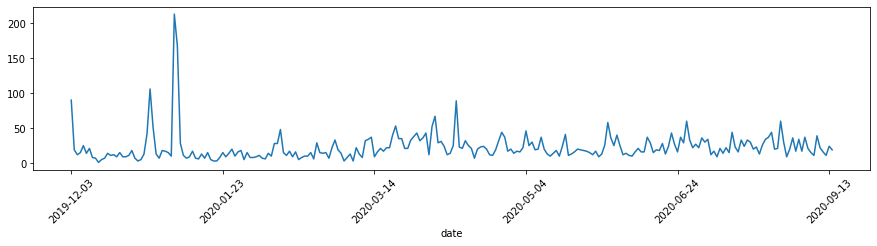

In [ ]:
df.groupby('date')['conversation_id'].count().plot(figsize=(15,3))
plt.xticks(rotation=45)

In [ ]:
twitter_fct.mvh(df,10)

/content/fragile_context/twitter_fct.py:96: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  hashtags_g = hashtags.groupby('hashtag')['score','count','retweets_count','replies_count','likes_count'].sum()


,hashtag,score,count,retweets_count,replies_count,likes_count,translation
0,#الانبار,27576,369,1801,2933,9772,Anbar
1,#العراق,27209,611,2232,1292,12173,Iraq
2,#الأنبار,24171,612,2131,1188,9952,Anbar
3,#داعش,10924,49,318,1792,3958,Isis
4,#عاجل,9994,212,820,391,4721,Urgent
5,#الحشد_الشعبي,7973,53,783,357,2987,The popular crowd
6,#الإرهاب,5274,17,603,278,1425,Terror
7,#إيران,5274,34,593,276,1481,Iran
8,#عين_الأسد,5167,53,263,195,3267,Lion
9,#خامنئي,4445,13,503,239,1213,Khamenei


In [ ]:
for i in [1,2]:
    sample_tweet_link = df.iloc[i]['link']
    display(sample_tweet_link)
    twitter_fct.show_tweet(sample_tweet_link)


'https://twitter.com/MamunNtaah1/status/1275155008313589761'

'https://twitter.com/ahmedfaresalham/status/1228397304283004928'

### Time series of Hashtags

(array([-50.,   0.,  50., 100., 150., 200., 250., 300.]),
 <a list of 8 Text major ticklabel objects>)

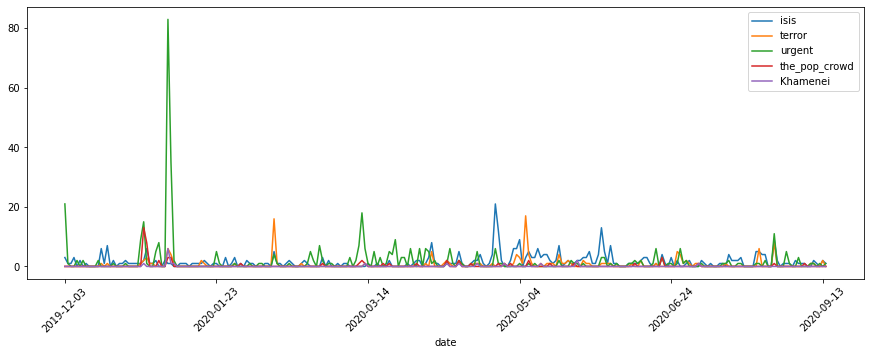

In [ ]:
df['isis'] = twitter_fct.ht2var(df,'داعش')
df['terror'] = twitter_fct.ht2var(df,'الإرهاب')
df['urgent'] = twitter_fct.ht2var(df,'عاجل')
df['the_pop_crowd'] = twitter_fct.ht2var(df,'الحشد_الشعبي')
df['Khamenei'] = twitter_fct.ht2var(df,'خامنئي')

df.groupby('date')[['isis','terror','urgent','the_pop_crowd','Khamenei']].sum().plot(figsize=(15,5))
plt.xticks(rotation=45)

### Correlation of Hastags

In [ ]:
df[['isis','terror','urgent','the_pop_crowd','Khamenei']].corr()

,isis,terror,urgent,the_pop_crowd,Khamenei
isis,1.000000,0.213154,-0.030261,0.042054,-0.015328
terror,0.213154,1.000000,0.027843,0.148141,0.263322
urgent,-0.030261,0.027843,1.000000,0.085312,0.055278
the_pop_crowd,0.042054,0.148141,0.085312,1.000000,0.277189
Khamenei,-0.015328,0.263322,0.055278,0.277189,1.000000


### Context by Hashtag

In [ ]:
from googletransx import Translator
# ref.  - https://github.com/x0rzkov/py-googletrans#basic-usage

translator = Translator()

def word_count(str,no):
    counts = dict()
    words = str.split()

    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1
    sorted_dict = [(translator.translate(a.replace('#',''), dest='en').text,b) for a,b in sorted(counts.items(), key=lambda item: item[1])[-no:]]
    #sorted_list = sorted_dict.items()
    return sorted_dict


In [ ]:
isis_txt = ' '.join([sen for sen in  df['tweet'][df['isis']==1]])

In [ ]:
word_count(isis_txt,15)

[('،', 45),
 ('Iraq', 48),
 ('The crowd', 48),
 ('distance', 51),
 ('Before', 52),
 ('group', 54),
 ('And', 60),
 ('About', 64),
 ('Anbar', 138),
 ('On', 188),
 ('Anbar', 212),
 ('Isis', 310),
 ('Governorate', 400),
 ('From', 434),
 ('in a', 486)]

### show most influencial users

In [ ]:
tw_user = twitter_fct.mvu(df,10)
tw_user

/content/fragile_context/twitter_fct.py:109: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  hashtags_g = hashtags.groupby('username')['score','count','retweets_count','replies_count','likes_count'].sum()


,username,score,count,retweets_count,replies_count,likes_count
0,thepennyhoarder,77401,1,3452,3246,50403
1,dr_daark,14544,47,1205,735,6314
2,hushamalhashimi,7135,5,271,428,4496
3,mustafakamilm,6543,23,734,348,1829
4,omartvsd,6340,8,342,282,3784
5,ahmedfaresalham,6116,6,461,227,3130
6,jouma_anad,5816,3,65,1531,898
7,amsiiraq,5751,18,946,13,982
8,mamunntaah1,5487,1,330,310,2907
9,alhakamali91,5253,3,386,751,1070


In [ ]:
for users in tw_user['username'][:3]:
    sample_tweet_link = df[df['username']==users].iloc[0]['link']
    display(sample_tweet_link)
    twitter_fct.show_tweet(sample_tweet_link)

'https://twitter.com/thepennyhoarder/status/1256599637441548290'

'https://twitter.com/Dr_Daark/status/1242941242100658176'

'https://twitter.com/hushamalhashimi/status/1224981084368179200'

In [ ]:
#%%capture
!twint -u 'د. دارك' --csv --output dr_daark.csv --limit 100

CRITICAL:root:twint.get:User:'NoneType' object is not subscriptable
CRITICAL:root:twint.run:Twint:Feed:noDataExpecting value: line 1 column 1 (char 0)
sleeping for 15 secs
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/twint/run.py", line 65, in Feed
    self.feed, self.init = feed.Json(response)
  File "/usr/local/lib/python3.6/dist-packages/twint/feed.py", line 42, in Json
    json_response = loads(response)
  File "/usr/lib/python3.6/json/__init__.py", line 354, in loads
    return _default_decoder.decode(s)
  File "/usr/lib/python3.6/json/decoder.py", line 339, in decode
    obj, end = self.raw_decode(s, idx=_w(s, 0).end())
  File "/usr/lib/python3.6/json/decoder.py", line 357, in raw_decode
    raise JSONDecodeError("Expecting value", s, err.value) from None
json.decoder.JSONDecodeError: Expecting value: line 1 column 1 (char 0)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/l

In [ ]:
!ls fragile_context

__pycache__  README.md	requirements.txt  twitter_fct.py


In [ ]:
df_daark = pd.read_csv('dr_daark.csv')

FileNotFoundError: ignored

In [ ]:
twitter_fct.mvh(df_daark,10)